# Problem Statment 
## Perform clustering (K means ) for the airlines data to obtain optimum number of clusters.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#for eastwestAirlines
df=pd.read_csv('https://raw.githubusercontent.com/AliHumadi2000/Clustering/main/EastWestAirlines.csv')


In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#EDA
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [5]:
#columns name, counts,shapes ,dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
#null and duplicated
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.duplicated().sum()#no duplicated value found

0

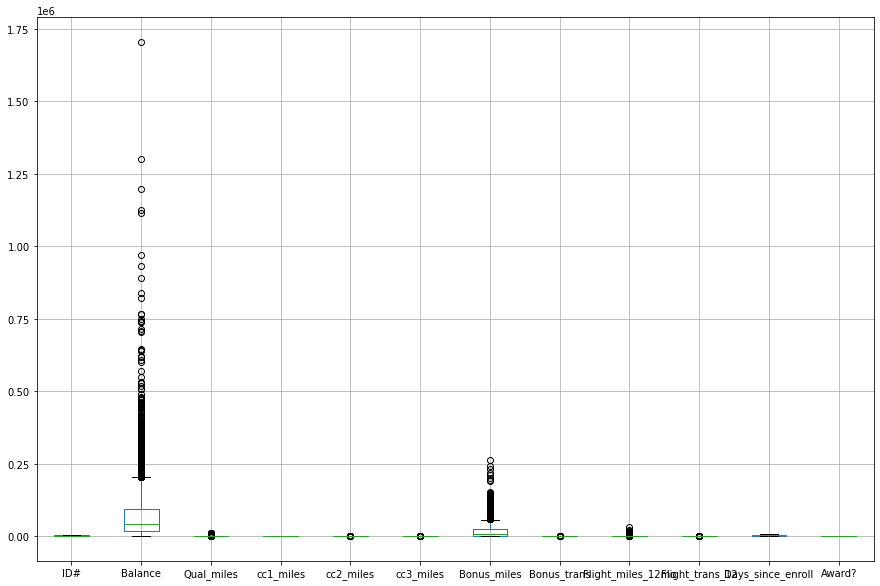

In [8]:
# chech outliers 
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

In [9]:
import seaborn as sns

<AxesSubplot:ylabel='Balance'>

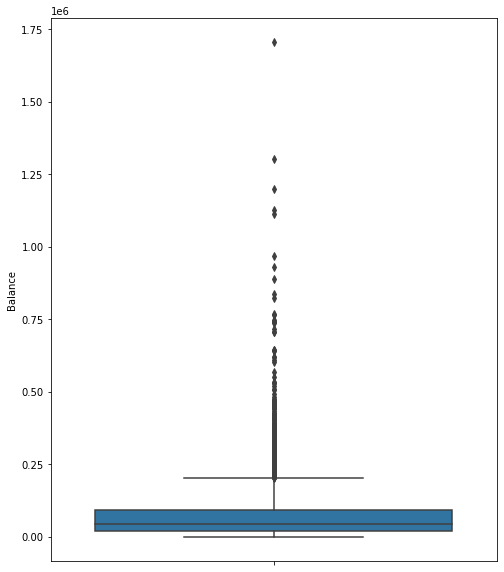

In [10]:
plt.figure(figsize=(8,10))
sns.boxplot(y=df['Balance'])

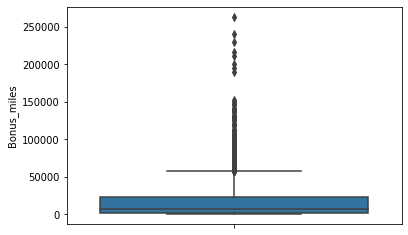

In [11]:
sns.boxplot(y=df.Bonus_miles)
plt.show()

In [12]:
#split the data
y = df['Award?']
x=df.drop(columns='Award?',axis=1,inplace=False)
x

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034
3,4,14776,0,1,1,1,500,1,0,0,6952
4,5,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403
3995,4018,64385,0,1,1,1,981,5,0,0,1395
3996,4019,73597,0,3,1,1,25447,8,0,0,1402
3997,4020,54899,0,1,1,1,500,1,500,1,1401


# As we can see the data has alot of noise and outliers 
## so better if we use DBSCAN 

In [13]:
#create a model
#first lets scale the data
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X= ms.fit_transform(x)

In [14]:
X[1,1:]

array([1.12878760e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.15366820e-04, 2.32558140e-02, 0.00000000e+00,
       0.00000000e+00, 8.39884254e-01])

In [15]:
#create new data frame for the scaling data 
df_new=pd.DataFrame(X,columns=[x.columns])
df_new.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [16]:
# #remove ID#
# df_new.dr
# df_new.head()

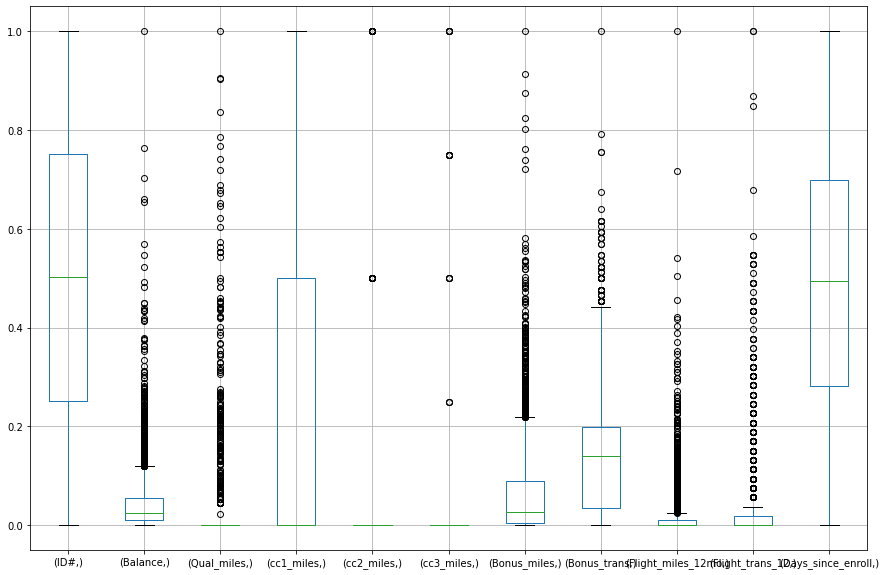

In [17]:
#check outliers again
# chech outliers 
plt.figure(figsize=(15,10))
df_new.boxplot()
plt.show()

In [18]:
#first initilize 3 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(df_new)

KMeans(n_clusters=2, random_state=0)

In [19]:
kmeans.cluster_centers_

array([[0.26307381, 0.06028705, 0.01446686, 0.43335076, 0.00444328,
        0.00522739, 0.10191836, 0.1694769 , 0.01634465, 0.02911558,
        0.69909643],
       [0.71909842, 0.02747644, 0.01151559, 0.11037872, 0.00982742,
        0.00107862, 0.03118211, 0.10320186, 0.01363005, 0.02298341,
        0.31037939]])

In [20]:
kmeans.inertia_

758.6664737402076

In [21]:
# Check quality of weak classification by the model 
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1546 out of 3999 samples were correctly labeled.


In [22]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.39


# Use elbow method to find optimal number of clusters

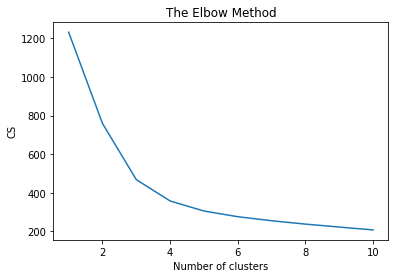

In [23]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(df_new)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1552 out of 3999 samples were correctly labeled.
Accuracy score: 0.39


# Now Let's use Hierarchical Clustering 

In [25]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [26]:
#standard and normalize the data 
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(x) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)


,P1,P2
0,0.160860,-0.921625
1,0.167098,-0.919492


In [27]:
# Converting the numpy array into a pandas DataFrame 
df_h = pd.DataFrame(normalized_df,columns=[x.columns]) 
df_h.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.623113,-0.162012,-0.066903,-0.276369,-0.035280,-0.022541,-0.252382,-0.396488,-0.118007,-0.130061,0.501131
1,-0.630161,-0.196017,-0.067693,-0.279633,-0.035697,-0.022807,-0.254747,-0.363332,-0.119401,-0.131597,0.501420
2,-0.659999,-0.121853,-0.070934,-0.293020,-0.037406,-0.023899,-0.205322,-0.301423,-0.125117,-0.137897,0.537594
3,-0.620379,-0.209044,-0.066709,-0.275567,-0.035178,-0.022475,-0.246816,-0.395338,-0.117665,-0.129683,0.491353
4,-0.496058,0.068658,-0.053367,0.403758,-0.028142,-0.017980,0.310272,0.429518,0.330843,0.198371,0.390725


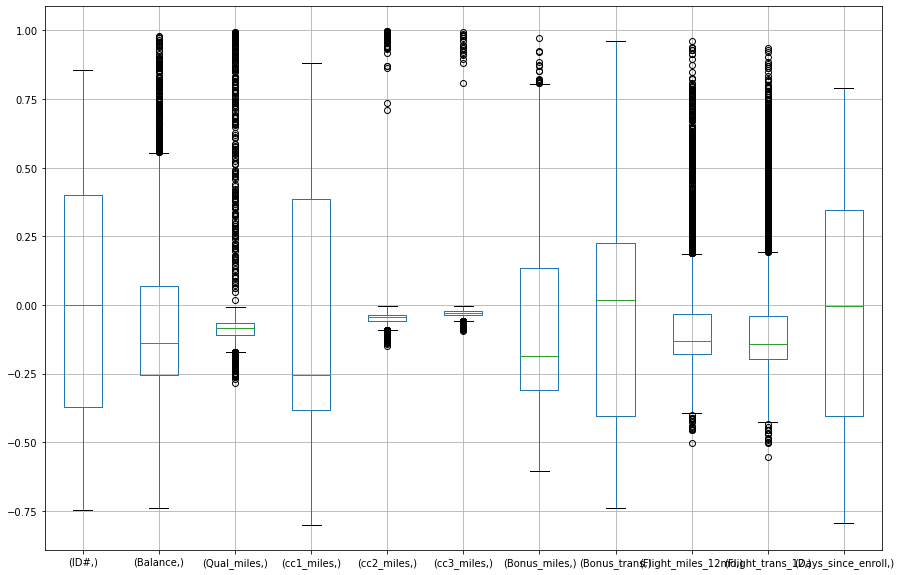

In [28]:
#check the outliers 
plt.figure(figsize=(15,10))
df_h.boxplot()

plt.show()

In [ ]:
plt.figure(figsize =(15, 10)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
    silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [ ]:
#build the model with 4 cluster 
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_principal)

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

# DBSCAN Clustring 

In [ ]:
# see the corelation 
sns.pairplot(df)


In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
#drop id column
df_h.drop(columns='ID#',axis=1)

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_h.corr(),linewidths=.5, fmt="d")

In [ ]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(df_h) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3'] 
  
X_principal.head()

In [ ]:
df['Award?'].value_counts()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#We need to calculate the eps and MinPoints 
#minpoints=2*number of dim ->> 2*3 =minPoints=6
#To Calculate the number of eps we need to calculate the neighbors 

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=3) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_principal) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_principal) #

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showi

In [ ]:
#number of eps is 2

In [ ]:
db=DBSCAN(eps=3,min_samples=26,metric='euclidean')

In [ ]:
#we'll fit the model with data that we used in previuos model
model=db.fit(X_principal)

In [ ]:
label=model.labels_
label


In [ ]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

In [ ]:
y_means = db.fit_predict(X_principal)
y_means


In [ ]:
# Plot the clusters
plt.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'],c = label, cmap= "plasma") # plotting the clusters

plt.show() # showing the plot